# The lineal path function
In the original version of the lineal path function described by Torquato, he proposes to insert lines of arbitrary length and orientation into the image, then count the fraction of these lines that lie wholly within a single phase. If the media is isotropic then it is not strictly necessary to use random orientations, since the length of the valid lines will be the same in all direction. On the other hand, if the material is anisotropic, then orientation does matter. Or, flipping this concept around, it becomes possible to detect anisotropy in an image by measuring the lineal-path function along a single direction, then repeating for perpedicular directions.  Anisotropy is thus revealed by the disparity in the lineal-path results.  

PoreSpy favors this latter approach, and computes the lineal-path function along a single axis. PoreSpy includes the ``distance_transform_lin`` function which can compute a version of the distance transform that is limited to the linear distance along the specified axis.  Applying this function to an image creates the input data for the lineal path function, which then computes the cumulative distribution function of the values in the image.  The following example outlines the steps to compute the lineal-path function in two perpendicular directions for an anisotropic image.

In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

First generate an anisotropic image using the ``blobs`` generator:

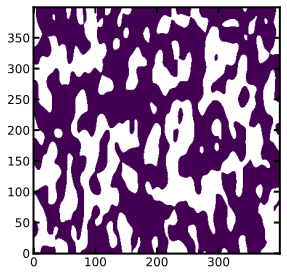

In [2]:
im = ps.generators.blobs([400, 400], blobiness=[1, 2], porosity=0.6)
ps.imshow(im);

Next apply the ``distance_transform_lin`` function along the 0 axis.  

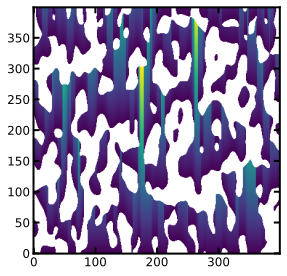

In [3]:
paths = ps.filters.distance_transform_lin(im, mode='forward', axis=0)
ps.imshow(paths);

The greyscale values of the above image are worth a comment. They indicated the length of a path that can be drawn from each voxel to the nearest solid voxel, in the specified direction.  Or in terms of Torquato's definition, each greyscale value represents a random starting point (A) and moving along this line until solid is encountered represents the end of the line (B), providing the path length A $\rightarrow$ B.  The 'counter associated with the distance between A and B is then incremented', which corresponds to the binning the greyscale values in the above image. In other words, the above representation includes ALL possible starting points on each path, so provides the largest possible data set.

With the image now computed, it can be passed to the ``lineal_path_distribution`` function, which computes the histogram.  The bins were set to a specific range so that they line up with subsequent plot shown below:

In [4]:
lpf = ps.metrics.lineal_path_distribution(paths, bins=range(1, 200, 10))

Finally, plottings:

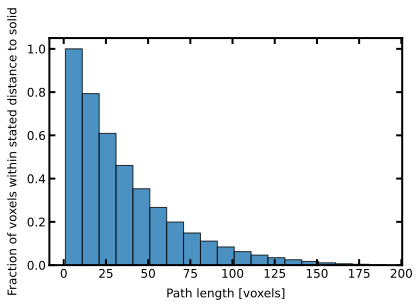

In [5]:
fig, ax = plt.subplots(1, 1)
ax.bar(x=lpf.L, height=lpf.cdf, width=lpf.bin_widths, edgecolor='k', alpha=0.8)
ax.set_xlabel('Path length [voxels]')
ax.set_ylabel('Fraction of voxels within stated distance to solid');

Since the image is anisotropic, the process will yeild a different result in the perpendicular direction, so repeating the above with ``axis=1`` instead of the default ``axis=0``.

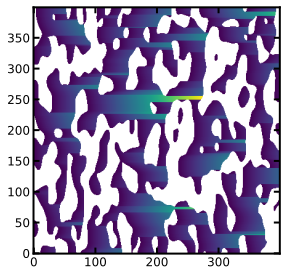

In [6]:
paths = ps.filters.distance_transform_lin(im, mode='forward', axis=1)
ps.imshow(paths);

Overlaying this result wit the previous one:

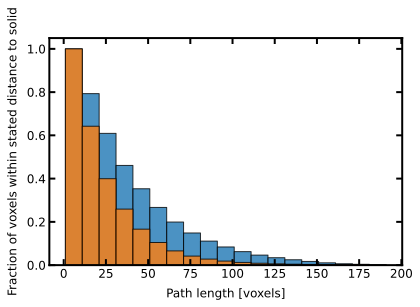

In [7]:
lpf = ps.metrics.lineal_path_distribution(paths, bins=range(1, 200, 10))
ax.bar(x=lpf.L, height=lpf.cdf, width=lpf.bin_widths, edgecolor='k', alpha=0.8);
fig

The anisotropy of the image is clearly visible with the first axis possessing longer lineal-path values.